<a id="99"></a>
# Python 3 Assignment
### Purpose: To cleanse and visualize data
<b>Program Sections</b>
<ul>
<li><a href = "#0">Import Python Packages</a></li>
<li><a href = "#1">Set Display</a></li>
<li><a href = "#2">Load the Data and Evaluate Fields</a></li>
<li><a href = "#3">Cleanse the Data</a></li> 
<li><a href = "#4">Feature Engineering</a></li>     
<li><a href = "#5">Visualize the Data</a></li>
<li><a href = "#6">Save the Data as a CSV File</a></li>
<li><a href = "#7">Assignment Submission</a></li></ul>

<a id="0"></a>
### Import Python Packages
<a href = "#99">Top</a>

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style

<a id="1"></a>
### Set Display
<a href = "#99">Top</a>

In [2]:
# Set display to show up to 100 columns in dataframe
pd.set_option('display.max_columns',100) 

<a id="2"></a>
### Load the Data and Evaluate Fields
<a href = "#99">Top</a>

In [3]:
# Read CSV file into dataframe
df_airbnb = pd.read_csv("Boston AirBnB.csv",encoding="latin1")

In [4]:
# Provide a listing of the field names in the dataframe
df_airbnb.columns.values

array(['ID', 'Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Is Superhost', 'Host Listings Count',
       'Host Has Profile Pic', 'Host Identity Verified', 'City',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Number Of Reviews', 'First Review',
       'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Instant Bookable', 'Cancellation Policy',
       'Reviews Per Month'], dtype=object)

In [5]:
# Look at the first few rows to see if everything came in cleanly
df_airbnb.head(3)

,ID,Name,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Is Superhost,Host Listings Count,Host Has Profile Pic,Host Identity Verified,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number Of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Instant Bookable,Cancellation Policy,Reviews Per Month
0,1341072,"Cozy, One bedroom Condo, Back Bay",4161865,Ally,11/15/2015,"Boston, Massachusetts, United States",within an hour,1,0.8,No,2,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,175.0,NaN,75.0,1,0,3,41,7/11/2017,6/11/2019,91.0,9.0,9.0,10.0,10.0,10.0,9.0,No,strict,1.56
1,9460898,Brand NEW South Boston 1 bedroom,1444340,Will,11/25/2014,"Boston, Massachusetts, United States",within a day,0.98,0.68,No,24,Yes,Yes,Boston,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,189.0,500,100.0,1,0,2,6,2/18/2019,8/19/2019,100.0,10.0,10.0,10.0,10.0,10.0,10.0,No,strict,0.89
2,13888974,"40 Pontiac street Boston, MA 02120",82250238,Joshi,7/7/2019,"Boston, Massachusetts, United States",within a day,0.5,1,No,1,Yes,No,Boston,House,Shared room,1,2.5,1.0,4.0,Real Bed,35.0,NaN,NaN,1,0,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,flexible,NaN


In [6]:
# Show the number of rows and columns in the dataframe
df_airbnb.shape

(3501, 40)

In [7]:
# Shows the data type and number of non-null values in the fields.
# Some fields seem to be incorrectly classified based on what they
#   contain from the results of two cells earlier.
# There are a lot of fields with missing values.
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3501 non-null   int64  
 1   Name                         3501 non-null   object 
 2   Host ID                      3501 non-null   int64  
 3   Host Name                    3501 non-null   object 
 4   Host Since                   3501 non-null   object 
 5   Host Location                3490 non-null   object 
 6   Host Response Time           3058 non-null   object 
 7   Host Response Rate           3501 non-null   object 
 8   Host Acceptance Rate         3501 non-null   object 
 9   Host Is Superhost            3501 non-null   object 
 10  Host Listings Count          3501 non-null   int64  
 11  Host Has Profile Pic         3501 non-null   object 
 12  Host Identity Verified       3501 non-null   object 
 13  City              

<a id="3"></a>
### Cleanse the Data
<a href = "#99">Top</a>

In [8]:
# See what values are generally in each field
df_airbnb.describe()

,ID,Host ID,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number Of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews Per Month
count,3.501000e+03,3.501000e+03,3501.000000,3501.000000,3487.000000,3491.000000,3492.000000,3501.000000,2447.000000,3501.000000,3501.000000,3501.000000,3501.000000,2756.000000,2746.000000,2751.000000,2749.000000,2751.000000,2747.000000,2748.000000,2812.000000
mean,8.325739e+06,2.458024e+07,59.837189,3.050271,1.215371,1.257806,1.611111,174.328478,68.628116,1.429306,10.935733,3.203656,19.466438,91.941219,9.434450,9.260996,9.650055,9.651399,9.413542,9.171033,1.977763
std,4.456132e+06,2.249734e+07,172.743740,1.779499,0.460037,0.753212,1.012368,149.259368,51.297226,1.054481,19.199513,8.975455,35.882647,9.508282,0.925396,1.163788,0.758588,0.728309,0.904431,1.009892,2.124652
min,3.353000e+03,4.240000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,5.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,4.609785e+06,5.997103e+06,1.000000,2.000000,1.000000,1.000000,1.000000,85.000000,25.000000,1.000000,0.000000,1.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,8.458210e+06,1.924637e+07,2.000000,2.000000,1.000000,1.000000,1.000000,150.000000,50.000000,1.000000,0.000000,2.000000,6.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.185000
75%,1.259322e+07,3.574254e+07,7.000000,4.000000,1.000000,2.000000,2.000000,220.000000,100.000000,1.000000,20.000000,3.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.730000
max,1.484378e+07,9.287818e+07,749.000000,16.000000,5.000000,5.000000,16.000000,4000.000000,300.000000,14.000000,200.000000,300.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


In [10]:
# Show the records that have no entry for the Bathrooms field
df_airbnb.loc[df_airbnb["Bathrooms"].isnull()]

,ID,Name,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Is Superhost,Host Listings Count,Host Has Profile Pic,Host Identity Verified,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number Of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Instant Bookable,Cancellation Policy,Reviews Per Month
518,12627225,Local BedNBreakfast Mins 2 Dwntown,64824435,Kaitlin,3/28/2019,US,within an hour,0.96,1,No,3,Yes,No,Boston,Bed & Breakfast,Private room,2,NaN,1.0,NaN,Real Bed,60.0,NaN,15.0,1,20,1,10,7/15/2019,8/23/2019,58.0,6.0,5.0,8.0,8.0,5.0,6.0,Yes,strict,5.45
622,822063,Couch perfect for short stay!,4142522,Heather,11/13/2015,US,NaN,N/A,N/A,No,1,Yes,No,Boston,Apartment,Shared room,1,NaN,1.0,1.0,Real Bed,35.0,"1,000.00",NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,flexible,NaN
922,12857811,Local BednBreakfast Nxt 2 Dwntown,64824435,Kaitlin,3/28/2019,US,within an hour,0.96,1,No,3,Yes,No,Boston,House,Private room,2,NaN,1.0,NaN,Real Bed,60.0,NaN,15.0,1,20,1,14,6/9/2019,8/12/2019,62.0,7.0,5.0,8.0,8.0,5.0,6.0,Yes,flexible,4.62
1006,225224,4th floor office room,85770,Robert,2/25/2013,"Boston, Massachusetts, United States",within a few hours,1,0.96,No,5,Yes,Yes,Boston,House,Private room,1,NaN,1.0,1.0,Real Bed,98.0,NaN,10.0,1,0,1,184,10/15/2014,8/24/2019,91.0,9.0,8.0,10.0,9.0,10.0,9.0,No,moderate,3.09
1022,25142,Beautiful 2BRs - Fenway Area,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,4,NaN,2.0,2.0,Real Bed,349.0,NaN,150.0,1,0,3,9,8/20/2013,10/27/2018,88.0,9.0,10.0,9.0,9.0,9.0,9.0,No,super_strict_30,0.12
1101,276450,Convenient 1 bedroom on Tremont St,1444340,Will,11/25/2014,"Boston, Massachusetts, United States",within a day,0.98,0.68,No,24,Yes,Yes,Boston,Apartment,Entire home/apt,4,NaN,1.0,1.0,Real Bed,167.0,500,100.0,1,0,2,54,5/9/2015,7/13/2019,82.0,9.0,9.0,9.0,8.0,9.0,8.0,No,strict,1.02
1524,658029,Splendid Tremont St. 1 bedroom,1444340,Will,11/25/2014,"Boston, Massachusetts, United States",within a day,0.98,0.68,No,24,Yes,Yes,Boston,Apartment,Entire home/apt,4,NaN,1.0,1.0,Real Bed,163.0,500,100.0,1,0,2,65,9/20/2015,6/19/2019,86.0,9.0,9.0,9.0,8.0,9.0,8.0,No,strict,1.35
1711,1426754,Boston Best furnished Studio (H2a),5578043,Dror,3/21/2016,"New York, New York, United States",within an hour,1,1,No,11,Yes,No,Boston,Apartment,Entire home/apt,2,NaN,1.0,NaN,Real Bed,99.0,300,75.0,1,0,1,73,8/25/2016,8/30/2019,91.0,10.0,9.0,9.0,9.0,10.0,9.0,Yes,strict,1.97
1741,1391215,Nice Cozy / room E,119019,Hermina,5/4/2013,"Boston, Massachusetts, United States",within an hour,1,1,No,11,Yes,Yes,Dorchester,House,Private room,2,NaN,1.0,1.0,Real Bed,50.0,100,15.0,1,15,2,111,8/11/2016,8/20/2019,87.0,9.0,9.0,9.0,9.0,8.0,9.0,Yes,moderate,2.97
1940,67946,Lux High Rise in Fenway,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Private room,3,NaN,1.0,1.0,Real Bed,249.0,NaN,150.0,1,0,3,1,9/29/2014,9/29/2014,100.0,10.0,10.0,10.0,6.0,8.0,8.0,No,super_strict_30,0.02


In [11]:
# Delete the records with no entry in Bathrooms field
df_airbnb = df_airbnb.dropna(how='any', subset=["Bathrooms"])

In [12]:
# Show the records that have no entry for the Bedrooms field
df_airbnb.loc[df_airbnb["Bedrooms"].isnull()]

,ID,Name,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Is Superhost,Host Listings Count,Host Has Profile Pic,Host Identity Verified,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number Of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Instant Bookable,Cancellation Policy,Reviews Per Month
93,23619,Newly upgrade Beacon Hill Studio,93112,Henry And Lisa,3/13/2013,"Boston, Massachusetts, United States",within an hour,1,0.86,No,6,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,175.0,NaN,50.0,2,0,4,127,6/5/2013,8/24/2019,92.0,9.0,9.0,10.0,10.0,10.0,9.0,Yes,strict,1.67
232,1071144,Small Studio In South End,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,269.0,NaN,NaN,1,0,3,1,8/2/2016,8/2/2016,91.0,8.0,10.0,10.0,10.0,10.0,8.0,No,super_strict_30,0.03
1289,9824,Fab Studio- close to Newbury,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,209.0,NaN,NaN,1,0,2,22,6/17/2014,6/18/2019,78.0,8.0,9.0,10.0,9.0,10.0,8.0,No,super_strict_30,0.35
1492,1044307,Grand Studio - South End,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,275.0,NaN,NaN,1,0,3,1,11/9/2016,11/9/2016,NaN,10.0,10.0,10.0,8.0,10.0,6.0,No,super_strict_30,0.03
1770,754845,Fab Studio close to Newbury,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,209.0,NaN,NaN,1,0,2,17,5/22/2016,7/30/2019,92.0,8.0,9.0,10.0,10.0,10.0,9.0,No,super_strict_30,0.42
1827,1372816,Fab Studio Close to Newbury,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,209.0,NaN,NaN,1,0,2,6,10/21/2016,5/19/2019,87.0,9.0,10.0,9.0,9.0,10.0,9.0,No,super_strict_30,0.17
2086,22208,Small Studio in South End,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,225.0,NaN,NaN,2,0,3,4,9/4/2013,7/28/2018,90.0,10.0,9.0,10.0,10.0,9.0,9.0,No,super_strict_30,0.05
2456,1119740,Small Studio in South End,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,186.0,NaN,NaN,1,0,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,super_strict_30,NaN
3420,1077105,"Studio Apt. for Rent in South End,",5927277,J,4/13/2016,US,within a day,1,1,No,1,Yes,No,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,176.0,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,flexible,NaN
3468,9765,Grand Studio - South End,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,229.0,NaN,75.0,1,0,2,9,9/21/2014,10/23/2018,89.0,10.0,10.0,10.0,9.0,10.0,8.0,No,super_strict_30,0.15


In [13]:
# Delete the records with no entry in Bedrooms field
df_airbnb = df_airbnb.dropna(how='any', subset=["Bedrooms"]) 

In [14]:
# Show the records that have no entry for the Beds field
df_airbnb.loc[df_airbnb["Beds"].isnull()]

,ID,Name,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Is Superhost,Host Listings Count,Host Has Profile Pic,Host Identity Verified,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number Of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Instant Bookable,Cancellation Policy,Reviews Per Month
683,14604429,Bedroom in to Allston/Brookline area for,90615440,Maureen,8/18/2019,"Boston, Massachusetts, United States",within a day,1,0.67,No,1,Yes,No,Boston,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,60.0,NaN,20.0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,flexible,NaN
938,12857981,Local BedNBreafast Nxt 2 Dwntown,64824435,Kaitlin,3/28/2019,US,within an hour,0.96,1,No,3,Yes,No,Boston,House,Private room,2,1.0,1.0,NaN,Real Bed,60.0,NaN,15.0,1,20,1,3,5/29/2019,9/1/2019,93.0,9.0,9.0,10.0,10.0,9.0,9.0,Yes,strict,0.88
1916,8152796,A very clean place nearby subway,40314351,Ryan,8/1/2018,"Belmont, Massachusetts, United States",NaN,N/A,N/A,No,1,Yes,No,Boston,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,80.0,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,flexible,NaN
2016,14336348,4 minutes walk to the Longwood Medical A,30679372,Khaled,4/5/2018,"Boston, Massachusetts, United States",within a day,1,0.67,No,1,Yes,Yes,Boston,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,99.0,NaN,NaN,1,50,2,1,8/22/2019,8/22/2019,100.0,10.0,10.0,10.0,10.0,10.0,8.0,No,moderate,1.00


In [15]:
# Substitute the value "1" for Bed entries that are empty.
df_airbnb = df_airbnb.fillna(value = {"Beds" : 1})

In [16]:
# Replace all forms of missing data in all fields with Python readable NaN
df_airbnb.replace([" N/A ","N/A"," -   "],np.NaN, inplace = True)

In [17]:
# Convert fields read as object to numeric after missing data indicators were removed
df_airbnb["Host Response Rate"] = pd.to_numeric(df_airbnb["Host Response Rate"])
df_airbnb["Host Acceptance Rate"] = pd.to_numeric(df_airbnb["Host Acceptance Rate"])

In [18]:
# Show values in Price from large to small
df_airbnb["Price"].sort_values(ascending=False)

1611    4000.0
192     3000.0
2202    1400.0
1923    1372.0
212     1345.0
         ...  
3477      22.0
2668      22.0
783       20.0
1454      11.0
1416      10.0
Name: Price, Length: 3477, dtype: float64

In [20]:
# Get row indexes for rows where Price is more than 1400
index_names = df_airbnb[df_airbnb['Price'] > 1400 ].index

# Delete these row indexes from dataframe
df_airbnb.drop(index_names, inplace=True)

In [21]:
# Calculate the number of observations of each property type
df_airbnb['Property Type'].value_counts()

Apartment          2553
House               550
Condominium         224
Townhouse            51
Loft                 39
Bed & Breakfast      36
Boat                 12
Villa                 6
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: Property Type, dtype: int64

In [22]:
# Drop rows with rare property types
df_airbnb.drop(df_airbnb[df_airbnb['Property Type'] \
                         .isin(["Dorm", "Guesthouse", "Camper/RV"])] \
                         .index, inplace = True)

In [23]:
# Calculate the percentage of observations of each room type
df_airbnb['Room Type'].value_counts(normalize=True) \
                      .mul(100).round(1).astype(str) + '%'

Entire home/apt    60.0%
Private room       38.1%
Shared room         2.0%
Name: Room Type, dtype: object

In [24]:
# Calculate the number of observations of each bed type
df_airbnb['Bed Type'].value_counts()

Real Bed         3341
Futon              51
Airbed             39
Pull-out Sofa      31
Couch               9
Name: Bed Type, dtype: int64

In [25]:
# Convert field to compatible floating point string by removing commas
df_airbnb["Security Deposit"].replace(",", "", inplace=True, regex=True)

# Convert field to numeric
df_airbnb["Security Deposit"] = pd.to_numeric(df_airbnb["Security Deposit"])

# Replace missing data with zeroes
df_airbnb['Security Deposit'].fillna(0, inplace=True)

In [26]:
# Replace missing data with zeroes
df_airbnb['Cleaning Fee'].replace(0, inplace=True)

In [28]:
# Replace missing values with most common categorical result
df_airbnb['Host Response Time'].fillna(df_airbnb['Host Response Time'] \
                               .value_counts().idxmax(), inplace=True)

<a id="4"></a>
### Feature Engineering
<a href = "#99">Top</a>

##### Fix Accommodations versus Guests Included

In [29]:
# Create feature that measure how many guests are not included in base price quote
df_airbnb['Guests Not Included'] = df_airbnb['Accommodates'] \
                                   - df_airbnb['Guests Included']

# There are clearly some problems with these results ... negative values?
df_airbnb['Guests Not Included'].describe()

count    3471.000000
mean        1.623163
std         1.560970
min       -13.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: Guests Not Included, dtype: float64

In [30]:
# Show the records that have a negative Guests Not Included value
df_airbnb.loc[df_airbnb["Guests Not Included"] < 0]

,ID,Name,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Is Superhost,Host Listings Count,Host Has Profile Pic,Host Identity Verified,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number Of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Instant Bookable,Cancellation Policy,Reviews Per Month,Guests Not Included
357,3432321,"Large, Sunny Beacon Hill Studio",17288874,Joseph,6/25/2017,US,within a day,1.00,1.00,No,1,Yes,No,Boston,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,220.0,350.0,85.0,3,0,1,82,7/7/2017,10/26/2018,94.0,10.0,9.0,10.0,10.0,10.0,9.0,No,strict,3.10,-1
426,8631257,Cozy private bedroom,14299534,Peng,4/14/2017,"Boston, Massachusetts, United States",within an hour,NaN,NaN,No,1,Yes,No,Boston,Loft,Private room,1,1.5,1.0,1.0,Real Bed,50.0,100.0,15.0,2,20,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,strict,NaN,-1
429,3006311,Spacious cozy Little Italy,5695034,Elizabeth,3/29/2016,"Boston, Massachusetts, United States",within a day,1.00,0.85,No,2,Yes,Yes,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,145.0,300.0,25.0,4,0,2,7,7/6/2017,8/9/2019,94.0,10.0,10.0,9.0,10.0,10.0,10.0,No,strict,0.26,-2
514,10607657,The Heart of Cleveland Circle,314580,Jesse,12/8/2013,"Boston, Massachusetts, United States",within an hour,1.00,0.92,No,1,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,175.0,0.0,50.0,3,25,2,6,4/24/2019,8/28/2019,93.0,10.0,10.0,10.0,10.0,10.0,9.0,No,strict,1.31,-1
615,13445221,"Great 2 bedrooms, 2 baths North End (M-G",5578043,Dror,3/21/2016,"New York, New York, United States",within an hour,1.00,1.00,No,11,Yes,No,Boston,Apartment,Entire home/apt,4,2.0,2.0,4.0,Real Bed,299.0,0.0,95.0,6,25,2,1,9/6/2019,9/6/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,strict,1.00,-2
709,585148,Trendy Loft in the South End,2883829,George,7/9/2015,"Boston, Massachusetts, United States",within an hour,1.00,1.00,No,5,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,225.0,500.0,80.0,3,100,2,31,7/31/2017,6/20/2019,93.0,10.0,9.0,9.0,10.0,9.0,9.0,No,strict,1.21,-1
1096,23668,Furnished 1BR At The Vesta,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,249.0,0.0,150.0,4,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,super_strict_30,NaN,-2
1402,11470818,Brownstone on Charming Dead End St.,32870796,Jessica,5/6/2018,"Boston, Massachusetts, United States",within a few hours,0.90,0.73,No,2,Yes,No,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,300.0,500.0,50.0,4,0,2,8,3/17/2019,7/22/2019,100.0,10.0,10.0,9.0,10.0,10.0,10.0,No,strict,1.37,-2
1412,12320063,room in beautiful house,66462220,Jana,4/9/2019,"Boston, Massachusetts, United States",within a day,1.00,1.00,No,1,Yes,No,Boston,Apartment,Private room,1,2.0,1.0,1.0,Real Bed,55.0,0.0,15.0,2,15,1,3,5/29/2019,8/14/2019,93.0,9.0,9.0,10.0,10.0,10.0,9.0,No,strict,0.88,-1
1426,6000531,1 BR Brownstone Freedom Trail,1446735,Mike,11/26/2014,"Boston, Massachusetts, United States",within a few hours,1.00,1.00,No,1,Yes,Yes,Boston,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,249.0,0.0,NaN,4,0,2,4,6/16/2018,8/12/2019,100.0,10.0,10.0,10.0,10.0,10.0,10.0,No,strict,0.27,-1


In [31]:
# Set conditionto catch negative guests note included
condition = df_airbnb['Guests Not Included'].lt(0)

# Set Guests included to be equal to amount Accommodated if condition met
df_airbnb['Guests Included'] = np.where(condition, 
                                        df_airbnb['Accommodates'], 
                                        df_airbnb['Guests Included'])

# Reset Guests Not Included, when negative, to zero
df_airbnb['Guests Not Included'] = np.where(condition, 
                                            0, 
                                            df_airbnb['Guests Not Included'])

##### Standardize all Review Scores

In [32]:
# Identify all Review Scores ... fields
reviewScores = df_airbnb.filter(regex='^Review Scores',axis=1).columns.values

# Show descriptive statistics on original review scores
df_airbnb[reviewScores].describe()

,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,2734.000000,2723.000000,2728.000000,2726.000000,2728.000000,2724.000000,2725.000000
mean,91.983906,9.438487,9.263930,9.652238,9.657258,9.416300,9.177248
std,9.494222,0.923298,1.161662,0.758637,0.723267,0.898425,1.006475
min,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,89.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [33]:
# Create new names for fields with percentile ratings
reviewScoresPctNames = [sub + ' Pct' for sub in reviewScores] 

#Show names
reviewScoresPctNames

['Review Scores Rating Pct',
 'Review Scores Accuracy Pct',
 'Review Scores Cleanliness Pct',
 'Review Scores Checkin Pct',
 'Review Scores Communication Pct',
 'Review Scores Location Pct',
 'Review Scores Value Pct']

In [34]:
# Convert the rating score to percentiles to address limited range of scores
df_airbnb[reviewScoresPctNames] = df_airbnb[reviewScores] \
                                           .rank(pct=True).mul(100).round(2)

In [35]:
# Show descriptive statistics on review score percentile fields
df_airbnb[reviewScoresPctNames].describe()

,Review Scores Rating Pct,Review Scores Accuracy Pct,Review Scores Cleanliness Pct,Review Scores Checkin Pct,Review Scores Communication Pct,Review Scores Location Pct,Review Scores Value Pct
count,2734.000000,2723.000000,2728.000000,2726.000000,2728.000000,2724.000000,2725.000000
mean,50.017268,50.017580,50.017515,50.017186,50.018464,50.021979,50.017842
std,28.671400,24.968743,25.857497,21.793803,21.808861,25.347484,26.632093
min,0.130000,0.070000,0.260000,0.070000,0.130000,0.090000,0.150000
25%,24.690000,24.610000,30.130000,62.470000,62.500000,26.400000,36.640000
50%,52.830000,69.460000,72.030000,62.470000,62.500000,70.690000,36.640000
75%,76.080000,69.460000,72.030000,62.470000,62.500000,70.690000,78.550000
max,88.640000,69.460000,72.030000,62.470000,62.500000,70.690000,78.550000


##### Create new measure of beds per included guest

In [36]:
# Calculate Guests Included per Bed at property

# Define function to error catch for zero beds
def guestsPerBed(df):
  if df['Beds'] == 0:
    return 0
  else: 
    return df['Guests Included'] / df['Beds']

# Apply function to dataframe
df_airbnb['Guests per Bed'] = df_airbnb.apply(guestsPerBed, axis=1)

# Show results of new field
df_airbnb['Guests per Bed'].describe()

count    3471.000000
mean        0.974615
std         0.494619
min         0.000000
25%         0.500000
50%         1.000000
75%         1.000000
max         4.000000
Name: Guests per Bed, dtype: float64

<a id="5"></a>
### Visualize the Data
<a href = "#99">Top</a>

In [37]:
# Set style and size of plots
sns.set(style='whitegrid')

##### Show distribution of price data

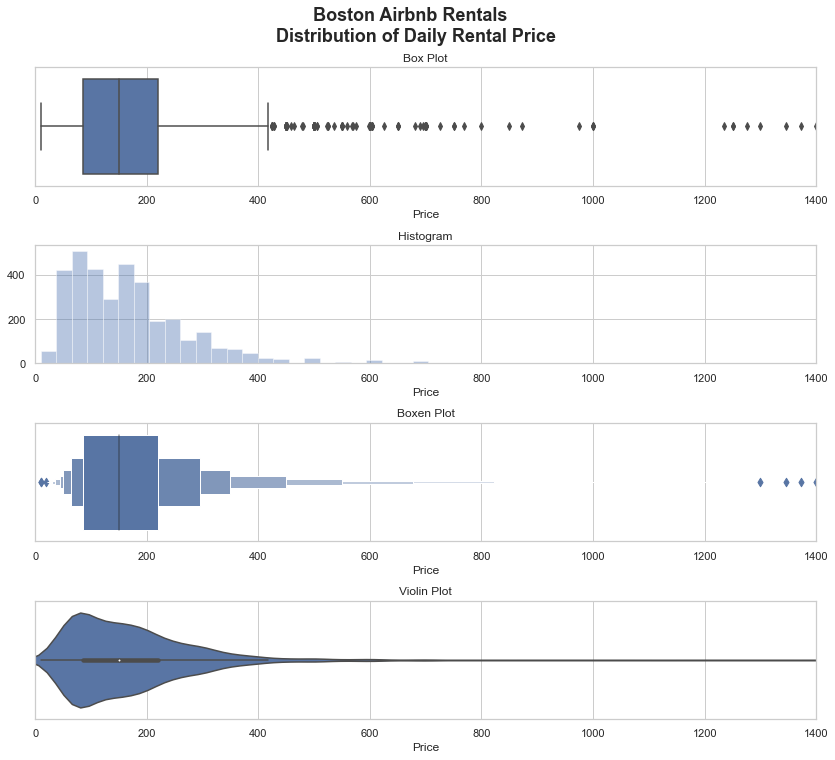

In [38]:
# This will catch an error that is not important on the color application
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Create 4 comparable forms of looking at distribution of observations
plt.figure(figsize=(14,12))
plt.subplots_adjust(hspace=0.5)

# Set overall title for plot
plt.suptitle('Boston Airbnb Rentals \n Distribution of Daily Rental Price', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y = .95)

# Create a boxplot of Auto Year
plt.subplot(411)
ax1 = sns.boxplot(x = 'Price', data = df_airbnb)
ax1.set(xlim=(0, 1400))
ax1.title.set_text("Box Plot")

# Create a histogram of Auto Year
plt.subplot(412)
ax2 = sns.distplot(df_airbnb['Price'], kde=False)
ax2.set(xlim=(0, 1400))
ax2.title.set_text("Histogram")

# Create a boxen plot of Auto Year
plt.subplot(413)
ax3 = sns.boxenplot(x = 'Price', data = df_airbnb)
ax3.set(xlim=(0, 1400))
ax3.title.set_text("Boxen Plot")

# Create a violin plot of Auto Year
plt.subplot(414)
ax4 = sns.violinplot(x = 'Price', data = df_airbnb)
ax4.set(xlim=(0, 1400))
ax4.title.set_text("Violin Plot")

plt.show()

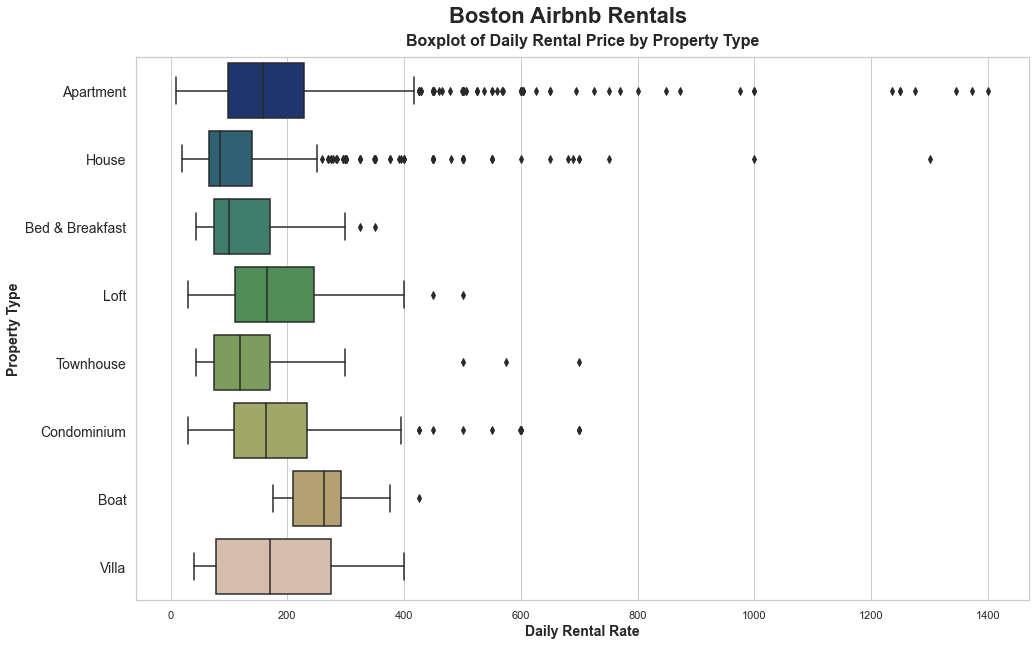

In [39]:
# Look at the distribution of daily rental prices with property type
plt.figure(figsize=(16,10))

# Set chart to boxplots by Property Type
chart = sns.boxplot(x = "Price", y = "Property Type", data = df_airbnb, palette = 'gist_earth')

chart.set_yticklabels(chart.get_yticklabels(), fontsize='14', 
                      horizontalalignment='right')

plt.suptitle('Boston Airbnb Rentals', fontweight='bold', 
          fontsize='22', horizontalalignment='center', y=.95)

plt.title('Boxplot of Daily Rental Price by Property Type', fontweight='bold', 
          fontsize='16', horizontalalignment='center', y=1.01)

plt.xlabel('Daily Rental Rate', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.ylabel('Property Type', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.show()

##### Descending column chart

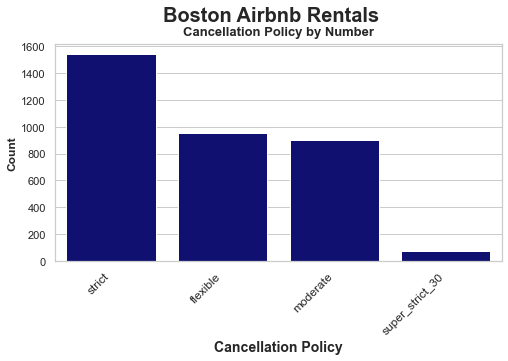

In [40]:
# Look atht erelative number of properties by cancellation policies
plt.figure(figsize=(8,4))

# Set chart to a column chart based on counts in a field
chart = sns.countplot(x = "Cancellation Policy",
                      data = df_airbnb, 
                      # Order descending by count
                      order = df_airbnb['Cancellation Policy'].value_counts().index, 
                      color= "navy")

# Alter labels on x-axis to improve readability
chart.set_xticklabels(chart.get_xticklabels(), 
                      fontsize='12', rotation=45, 
                      horizontalalignment='right')

plt.suptitle('Boston Airbnb Rentals', fontweight='bold', 
          fontsize='20', horizontalalignment='center', y=1.01)

plt.title('Cancellation Policy by Number', fontweight='bold', 
          fontsize='13', horizontalalignment='center', y=1.01)

plt.xlabel('Cancellation Policy', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.ylabel('Count', fontweight='bold', 
           fontsize='12', horizontalalignment='center')

plt.show()

<a id="6"></a>
### Save the Dataframe as a CSV File
<a href = "#99">Top</a>

In [41]:
# Save the dataframe as a CSV file for the next assignment
# This way you will not have to re-clean the data before analyzing it
df_airbnb.to_csv('Boston Airbnb Python Data.csv', index=False)

<a id="7"></a>
### Assignment Submission
<a href = "#99">Top</a>

## Python Assignment 3
### Name: George Gannon

In [42]:
# Provide the mean values for select fields by property type
cols = ['Host Acceptance Rate','Bathrooms','Bedrooms','Price',
        'Review Scores Rating Pct', 'Guests per Bed']
df_airbnb.groupby('Property Type')[cols].mean().round(2)

,Host Acceptance Rate,Bathrooms,Bedrooms,Price,Review Scores Rating Pct,Guests per Bed
Property Type,,,,,,
Apartment,0.84,1.16,1.23,179.81,48.70,0.98
Bed & Breakfast,0.92,1.19,1.03,134.75,54.71,1.12
Boat,0.65,1.33,1.83,268.83,41.92,0.55
Condominium,0.90,1.23,1.34,191.01,57.16,0.99
House,0.91,1.45,1.40,132.58,50.29,0.93
Loft,0.87,1.18,1.10,185.41,65.84,1.07
Townhouse,0.95,1.38,1.16,153.24,63.16,1.05
Villa,0.97,1.25,1.00,189.50,82.36,0.83


In [43]:
import datetime, socket
print(datetime.datetime.now().isoformat())
print("Your Computer Name is: " + socket.gethostname())
print("Your Computer IP Address is: " + socket.gethostbyname(socket.gethostname()))

2020-09-11T19:14:40.147125
Your Computer Name is: DESKTOP-0VRDGNF
Your Computer IP Address is: 192.168.1.139
